In [1]:
import os
import numpy as np 
from glob import glob
from PIL import Image
import cv2
import matplotlib.pyplot as plt 
import slideio

In [2]:
train_not_transition_list=glob('../../data/thumbnail/train/not_transition/*.tiff')
train_transition_list =glob('../../data/thumbnail/train/transition/*.tiff')
validation_not_transition_list=glob('../../data/thumbnail/validation/not_transition/*.tiff')
validation_transition_list =glob('../../data/thumbnail/validation/transition/*.tiff')

train_transition_image_list=[f.replace('/thumbnail/', '/mask_thumbnail/') for f in train_transition_list]
train_not_transition_image_list=[f.replace('/thumbnail/', '/mask_thumbnail/') for f in train_not_transition_list]
validation_transition_image_list=[f.replace('/thumbnail/', '/mask_thumbnail/') for f in validation_transition_list]
validation_not_transition_image_list=[f.replace('/thumbnail/', '/mask_thumbnail/') for f in validation_not_transition_list]


Text(0.5, 1.0, 'dst_image')

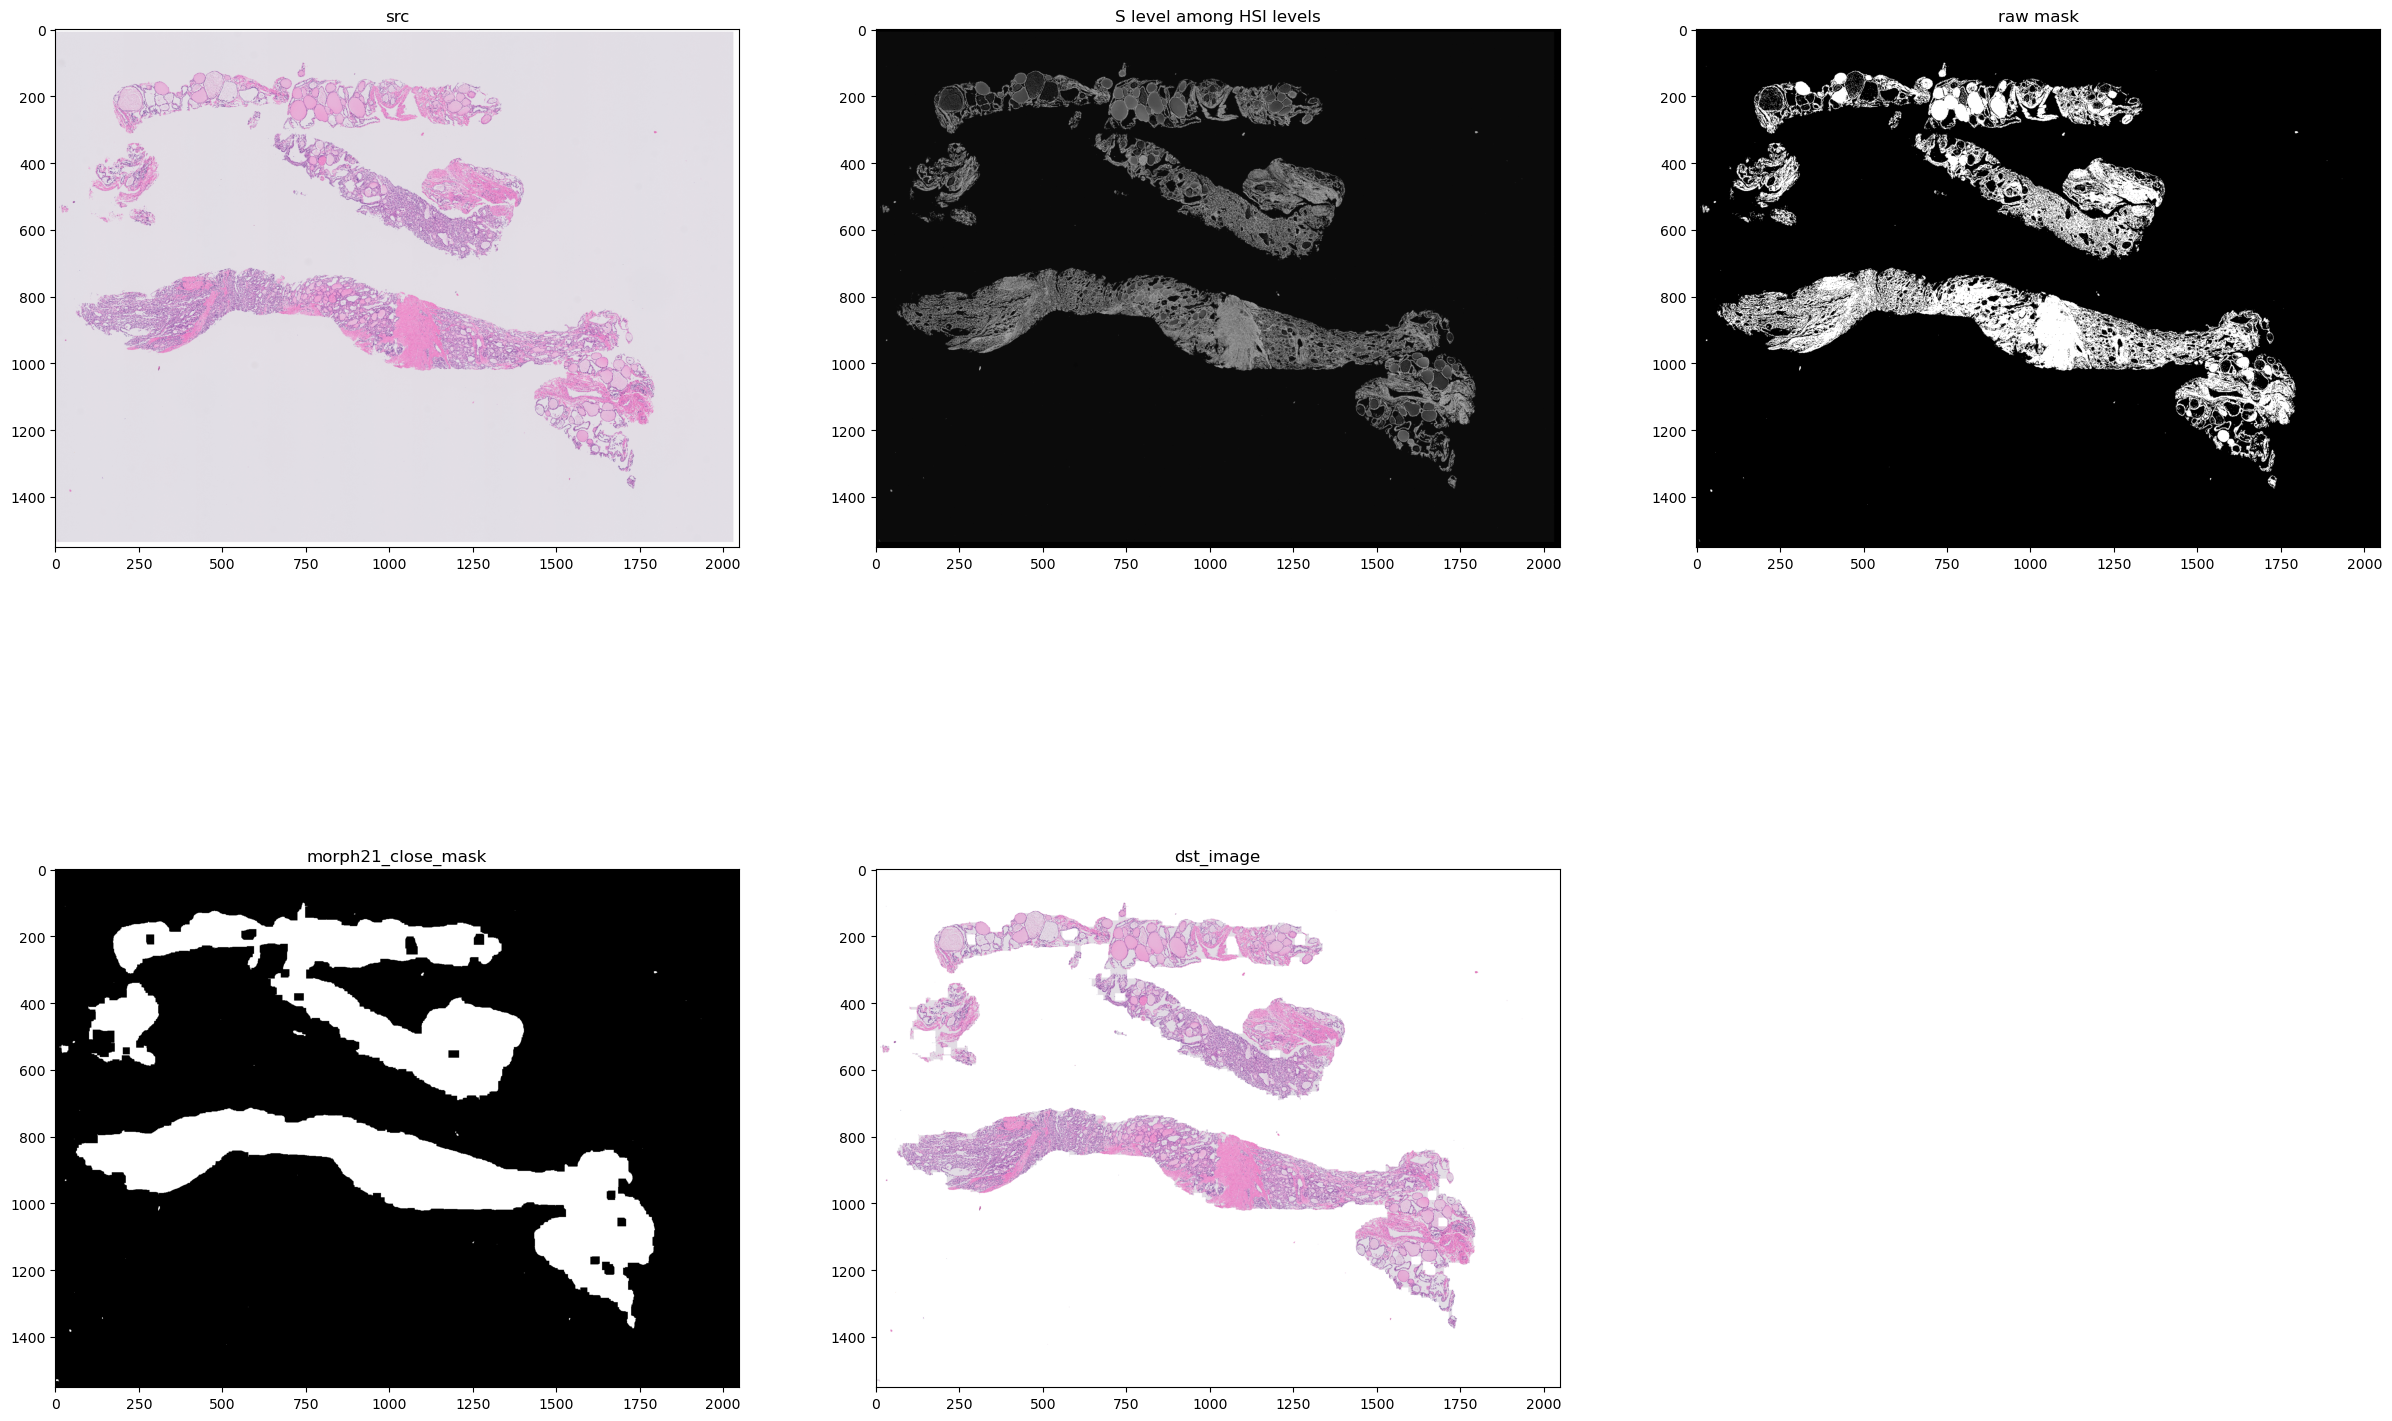

In [3]:
src_img=Image.open(train_not_transition_list[0])
src_array_img=np.array(src_img)
HSI_src_array_img=cv2.cvtColor(src_array_img, cv2.COLOR_RGB2HSV)
ret, binary_array_img = cv2.threshold(HSI_src_array_img[:,:,1],127,255, cv2.THRESH_OTSU)
k = cv2.getStructuringElement(cv2.MORPH_RECT, (21,21))
morph_array_image= cv2.morphologyEx(binary_array_img, cv2.MORPH_CLOSE, k)

dst_image=np.zeros((morph_array_image.shape[0],morph_array_image.shape[1],3))
zero_point=np.where(morph_array_image==0)
dst_image[zero_point]=(255,255,255)
dst_image=np.where(dst_image==(0,0,0),src_array_img,(255,255,255))
fig = plt.figure(figsize=(30,20))
rows = 2
cols = 3
ax1 = fig.add_subplot(rows, cols, 1)
ax1.imshow(src_array_img)
ax1.set_title('src')
 
ax2 = fig.add_subplot(rows, cols, 2)
ax2.imshow(HSI_src_array_img[:,:,1],'gray')
ax2.set_title('S level among HSI levels')

ax2 = fig.add_subplot(rows, cols, 3)
ax2.imshow(binary_array_img,'gray')
ax2.set_title('raw mask')

ax2 = fig.add_subplot(rows, cols, 4)
ax2.imshow(morph_array_image,'gray')
ax2.set_title('morph21_close_mask')

ax2 = fig.add_subplot(rows, cols, 5)
ax2.imshow(dst_image)
ax2.set_title('dst_image')


In [4]:
for i in range(len(train_not_transition_list)):
    src_img=Image.open(train_not_transition_list[i])
    src_array_img=np.array(src_img)
    HSI_src_array_img=cv2.cvtColor(src_array_img, cv2.COLOR_RGB2HSV)
    ret, binary_array_img = cv2.threshold(HSI_src_array_img[:,:,1],127,255, cv2.THRESH_OTSU)
    k = cv2.getStructuringElement(cv2.MORPH_RECT, (21,21))
    morph_array_image= cv2.morphologyEx(binary_array_img, cv2.MORPH_CLOSE, k)
    cv2.imwrite(train_not_transition_image_list[i],morph_array_image)
    
for i in range(len(train_transition_list)):
    src_img=Image.open(train_transition_list[i])
    src_array_img=np.array(src_img)
    HSI_src_array_img=cv2.cvtColor(src_array_img, cv2.COLOR_RGB2HSV)
    ret, binary_array_img = cv2.threshold(HSI_src_array_img[:,:,1],127,255, cv2.THRESH_OTSU)
    k = cv2.getStructuringElement(cv2.MORPH_RECT, (21,21))
    morph_array_image= cv2.morphologyEx(binary_array_img, cv2.MORPH_CLOSE, k)
    cv2.imwrite(train_transition_image_list[i],morph_array_image)
    

In [5]:
for i in range(len(validation_not_transition_list)):
    src_img=Image.open(validation_not_transition_list[i])
    src_array_img=np.array(src_img)
    HSI_src_array_img=cv2.cvtColor(src_array_img, cv2.COLOR_RGB2HSV)
    ret, binary_array_img = cv2.threshold(HSI_src_array_img[:,:,1],127,255, cv2.THRESH_OTSU)
    k = cv2.getStructuringElement(cv2.MORPH_RECT, (21,21))
    morph_array_image= cv2.morphologyEx(binary_array_img, cv2.MORPH_CLOSE, k)
    cv2.imwrite(validation_not_transition_image_list[i],morph_array_image)
    
for i in range(len(validation_transition_list)):
    src_img=Image.open(validation_transition_list[i])
    src_array_img=np.array(src_img)
    HSI_src_array_img=cv2.cvtColor(src_array_img, cv2.COLOR_RGB2HSV)
    ret, binary_array_img = cv2.threshold(HSI_src_array_img[:,:,1],127,255, cv2.THRESH_OTSU)
    k = cv2.getStructuringElement(cv2.MORPH_RECT, (21,21))
    morph_array_image= cv2.morphologyEx(binary_array_img, cv2.MORPH_CLOSE, k)
    cv2.imwrite(validation_transition_image_list[i],morph_array_image)
    